In [1]:
!cat job21/main.sh

#!/bin/bash
set -euxo pipefail

cat ${BASH_SOURCE[0]}

WORKDIR=$(pwd)

STRIDE=0

if [ -v SLURM_ARRAY_TASK_ID ]; then
  SEED="$((SLURM_ARRAY_TASK_ID+STRIDE))"
  WORKDIR="${WORKDIR}/${SLURM_ARRAY_JOB_ID}_${SEED}"
else
  SEED="0"
fi

ROOTDIR="/home/kaizu/t1/ctrw"
cd ${ROOTDIR}

mkdir --parents ${WORKDIR}

TRACER_DIAMETER=`python -c "print(list(range(10, 21))[(${SEED}%11)])"`
CROWDER_CONSTRAINT_DIAMETER=`python -c "print(2*list(range(0, 14, 2))[(${SEED}//11%7)])"`
# D_CROWDER=`python -c "print([9.375, 0.05][(${SEED}//(11*7)%2)])"`
D_CROWDER="0.3"
CROWDER_DIAMETER="9.6"
N_CROWDER_RIGHT="692"
DT="1e-9"

# IDX=`python -c "print(${SEED}//(11*17*2))"`
IDX=`python -c "print(${SEED}//(11*17))"`

date

${ROOTDIR}/build/a.out $SEED $TRACER_DIAMETER $CROWDER_CONSTRAINT_DIAMETER $D_CROWDER $CROWDER_DIAMETER $N_CROWDER_RIGHT $DT | tee ${WORKDIR}/result_${TRACER_DIAMETER}_${CROWDER_CONSTRAINT_DIAMETER}_${D_CROWDER}_${CROWDER_DIAMETER}_${N_CROWDER_RIGHT}_${DT}_${IDX}.csv

date


In [2]:
!ls job21

72639_0     72639_6197	       slurm-72639_1000.out  slurm-72639_61.out
72639_1     72639_6198	       slurm-72639_1001.out  slurm-72639_6200.out
72639_10    72639_6199	       slurm-72639_1002.out  slurm-72639_6201.out
72639_100   72639_62	       slurm-72639_1003.out  slurm-72639_6202.out
72639_1000  72639_620	       slurm-72639_1004.out  slurm-72639_6203.out
72639_1001  72639_6200	       slurm-72639_1005.out  slurm-72639_6204.out
72639_1002  72639_6201	       slurm-72639_1006.out  slurm-72639_6205.out
72639_1003  72639_6202	       slurm-72639_1007.out  slurm-72639_6206.out
72639_1004  72639_6203	       slurm-72639_1008.out  slurm-72639_6207.out
72639_1005  72639_6204	       slurm-72639_1009.out  slurm-72639_6208.out
72639_1006  72639_6205	       slurm-72639_100.out   slurm-72639_6209.out
72639_1007  72639_6206	       slurm-72639_1010.out  slurm-72639_620.out
72639_1008  72639_6207	       slurm-72639_1011.out  slurm-72639_6210.out
72639_1009  72639_6208	       slurm-72639_1012.out  slurm

72639_232   72639_7519	       slurm-72639_2323.out  slurm-72639_7522.out
72639_2320  72639_752	       slurm-72639_2324.out  slurm-72639_7523.out
72639_2321  72639_7520	       slurm-72639_2325.out  slurm-72639_7524.out
72639_2322  72639_7521	       slurm-72639_2326.out  slurm-72639_7525.out
72639_2323  72639_7522	       slurm-72639_2327.out  slurm-72639_7526.out
72639_2324  72639_7523	       slurm-72639_2328.out  slurm-72639_7527.out
72639_2325  72639_7524	       slurm-72639_2329.out  slurm-72639_7528.out
72639_2326  72639_7525	       slurm-72639_232.out   slurm-72639_7529.out
72639_2327  72639_7526	       slurm-72639_2330.out  slurm-72639_752.out
72639_2328  72639_7527	       slurm-72639_2331.out  slurm-72639_7530.out
72639_2329  72639_7528	       slurm-72639_2332.out  slurm-72639_7531.out
72639_233   72639_7529	       slurm-72639_2333.out  slurm-72639_7532.out
72639_2330  72639_753	       slurm-72639_2334.out  slurm-72639_7533.out
72639_2331  72639_7530	       slurm-72639_2335.out  sl

In [3]:
import glob, sys, os.path, itertools
import pathlib
from collections import defaultdict
import numpy

In [4]:
artifacts = pathlib.Path("./artifacts")

In [5]:
sys.path.append("/home/kaizu/t1/ctrw")
import scripts.io

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams["figure.dpi"] = 120

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
interval = 0.004
L1 = 0.149

In [9]:
N_tracer = 10
deltax = 0.050

In [10]:
fmt = "job21/72639_*/result_*_*_*_*_*_*_*.csv"
filenames1 = glob.glob(fmt)
fmt = "job21/80339_*/result_*_*_*_*_*_*_*.csv"
filenames1.extend(glob.glob(fmt))
print(len(filenames1))
filenames1 = scripts.io.clasify_files(filenames1)

11550


In [11]:
idxmin = numpy.inf
for key, filenames in filenames1.items():
    for filename in filenames:
        data = scripts.io.read_file(filename)
        t = sorted(data.keys(), key=lambda x: float(x))
        idxmin = min(len(t), idxmin)
idxmin

10001

In [12]:
data1 = {}
for key, filenames in filenames1.items():
    data_ = scripts.io.read_files(filenames, sp="X")
    data1[key] = data_

In [13]:
t1 = sorted(data1[list(data1.keys())[0]].keys(), key=lambda x: float(x))
t1 = t1[: idxmin]
t1[-1]

'0.1'

In [14]:
float(t1[-1]) - float(t1[-1000])

0.009989999999999999

In [15]:
xkeylabels, ykeylabels = [], []
for (tracer_diameter_, constraint_diameter_, D_crowder_, crowder_diameter_, N_crowder_right_, dt_) in data1.keys():
    xkeylabels.append(tracer_diameter_)
    ykeylabels.append(constraint_diameter_)
xkeylabels = sorted(set(xkeylabels), key=lambda i: float(i))
ykeylabels = sorted(set(ykeylabels), key=lambda i: float(i))

## Initial distributions

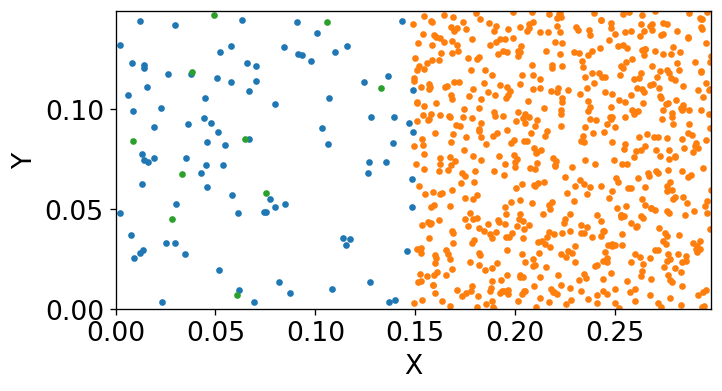

In [16]:
key1 = ('10', '0', '9.375', '9.6', '692', '1e-9')

fig, ax1 = plt.subplots()

for sp in ('C1', 'C2', 'X'):
    positions = scripts.io.read_file3d(filenames1[key1][0], sp=sp)['0']
    positions = numpy.array(positions).T
    plt.plot(positions[0], positions[1], '.', label=sp)

plt.xlim(0, 2 * L1)
plt.ylim(0, L1)
ax1.set_aspect('equal')
# plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig(artifacts / 'Mobile_Immobile1-01.svg', format='svg')
plt.show()

## Trajectory

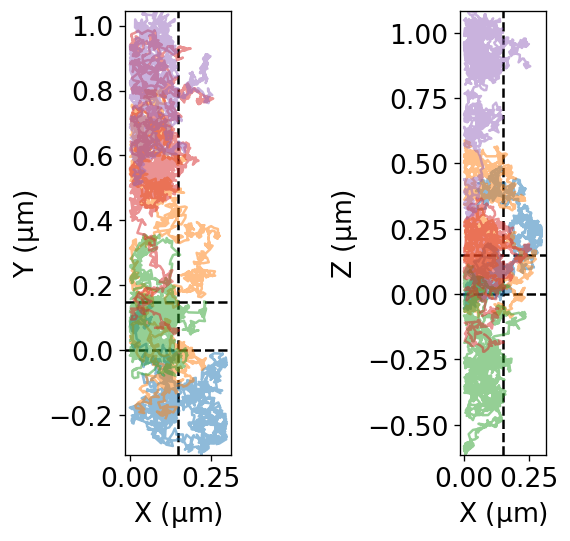

In [17]:
key1 = ('14', '0', '9.375', '9.6', '692', '1e-9')

positions = scripts.io.read_file3d(filenames1[key1][0], sp='X')
positions = numpy.array([positions[t_][0] for t_ in t1]).T

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot((-0.1 * L1, 2.1 * L1), (0, 0), 'k--')
ax1.plot((-0.1 * L1, 2.1 * L1), (L1, L1), 'k--')
ax1.plot((L1, L1), (positions[1].min(), positions[1].max()), 'k--')

for i in range(5):
    n = len(positions[0]) // 5
    ax1.plot(positions[0][n * i: n * (i + 1)], positions[1][n * i: n * (i + 1)], '-', label=sp, alpha=0.5)

ax1.set_xlim(-0.1 * L1, 2.1 * L1)
ax1.set_ylim(positions[1].min(), positions[1].max())
ax1.set_aspect('equal')
# plt.legend(loc='best')
ax1.set_xlabel(r'X ($\mathrm{\mu m}$)')
ax1.set_ylabel(r'Y ($\mathrm{\mu m}$)')

ax2.plot((-0.1 * L1, 2.1 * L1), (0, 0), 'k--')
ax2.plot((-0.1 * L1, 2.1 * L1), (L1, L1), 'k--')
ax2.plot((L1, L1), (positions[2].min(), positions[2].max()), 'k--')

for i in range(5):
    n = len(positions[0]) // 5
    ax2.plot(positions[0][n * i: n * (i + 1)], positions[2][n * i: n * (i + 1)], '-', label=sp, alpha=0.5)

ax2.set_xlim(-0.1 * L1, 2.1 * L1)
ax2.set_ylim(positions[2].min(), positions[2].max())
ax2.set_aspect('equal')
# plt.legend(loc='best')
ax2.set_xlabel(r'X ($\mathrm{\mu m}$)')
ax2.set_ylabel(r'Z ($\mathrm{\mu m}$)')

fig.savefig(artifacts / 'Mobile_Immobile1-02.svg', format='svg')
plt.show()

## Distributions

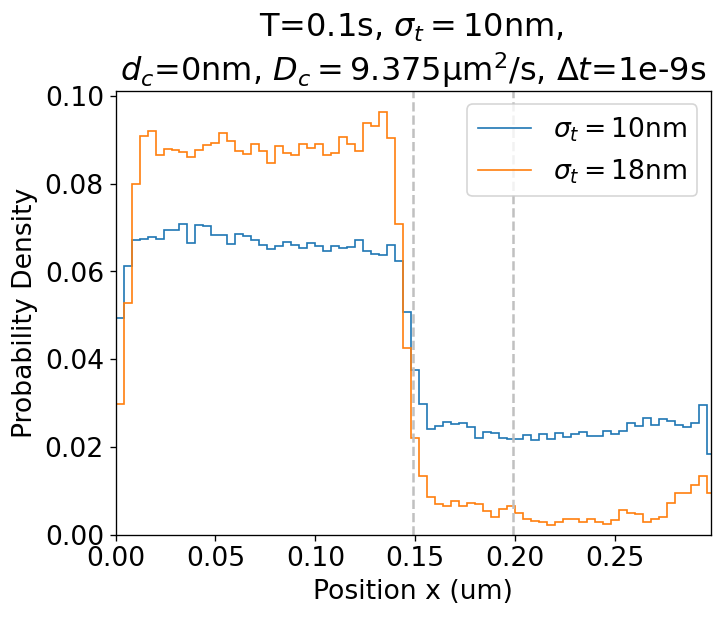

In [18]:
key1 = ('10', '0', '9.375', '9.6', '692', '1e-9')
key2 = ('18', '0', '9.375', '9.6', '692', '1e-9')

fig, ax1 = plt.subplots()

ymax = 0

tmp = numpy.array(sum([data1[key1][t_] for t_ in t1[-300: ]], []))
L = L1 * 2
bins = numpy.arange(0, L + interval, interval)
counts, _ = numpy.histogram(tmp, bins=bins)
ymax = max(ymax, max(counts) / sum(counts) / L)
plt.stairs(counts / sum(counts) / L, bins, label=fr"$\sigma_t=${key1[0]}nm")

tmp = numpy.array(sum([data1[key2][t_] for t_ in t1[-300: ]], []))
L = L1 * 2
bins = numpy.arange(0, L + interval, interval)
counts, _ = numpy.histogram(tmp, bins=bins)
ymax = max(ymax, max(counts) / sum(counts) / L)
plt.stairs(counts / sum(counts) / L, bins, label=fr"$\sigma_t=${key2[0]}nm")

plt.plot((L1, L1), (0, 1.05 * ymax), '--', color="silver")
plt.plot((L1 + deltax, L1 + deltax), (0, 1.05 * ymax), '--', color="silver")

plt.xlabel("Position x (um)")
plt.ylabel("Probability Density")
plt.xlim(0 * L1, 2 * L1)
plt.ylim(0, 1.05 * ymax)
plt.legend(loc='upper right')
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")

fig.savefig(artifacts / 'Mobile_Immobile1-03.svg', format='svg')
plt.show()

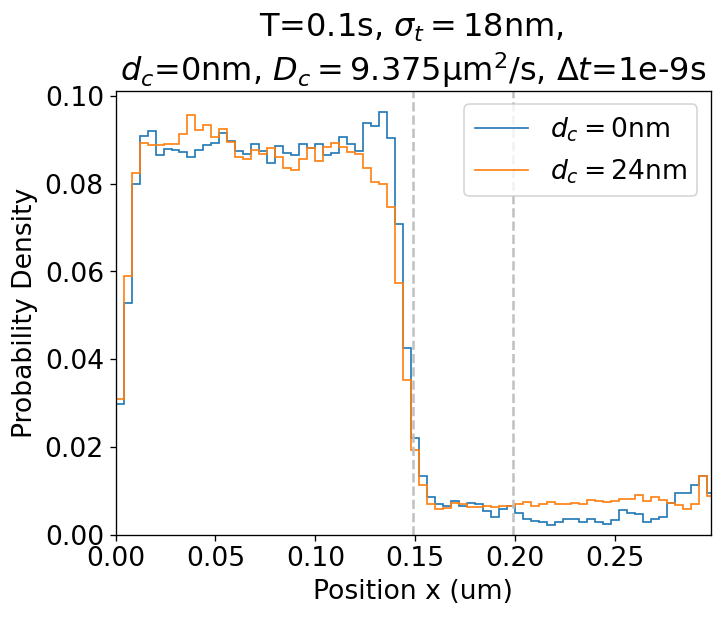

In [19]:
key1 = ('18', '0', '9.375', '9.6', '692', '1e-9')
key2 = ('18', '24', '9.375', '9.6', '692', '1e-9')

fig, ax1 = plt.subplots()

ymax = 0

tmp = numpy.array(sum([data1[key1][t_] for t_ in t1[-300: ]], []))
L = L1 * 2
bins = numpy.arange(0, L + interval, interval)
counts, _ = numpy.histogram(tmp, bins=bins)
ymax = max(ymax, max(counts) / sum(counts) / L)
plt.stairs(counts / sum(counts) / L, bins, label=fr"$d_c=${key1[1]}nm")

tmp = numpy.array(sum([data1[key2][t_] for t_ in t1[-300: ]], []))
L = L1 * 2
bins = numpy.arange(0, L + interval, interval)
counts, _ = numpy.histogram(tmp, bins=bins)
ymax = max(ymax, max(counts) / sum(counts) / L)
plt.stairs(counts / sum(counts) / L, bins, label=fr"$d_c=${key2[1]}nm")

plt.plot((L1, L1), (0, 1.05 * ymax), '--', color="silver")
plt.plot((L1 + deltax, L1 + deltax), (0, 1.05 * ymax), '--', color="silver")

plt.xlabel("Position x (um)")
plt.ylabel("Probability Density")
plt.xlim(0 * L1, 2 * L1)
plt.ylim(0, 1.05 * ymax)
plt.legend(loc='upper right')
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")

fig.savefig(artifacts / 'Mobile_Immobile1-04.svg', format='svg')
plt.show()

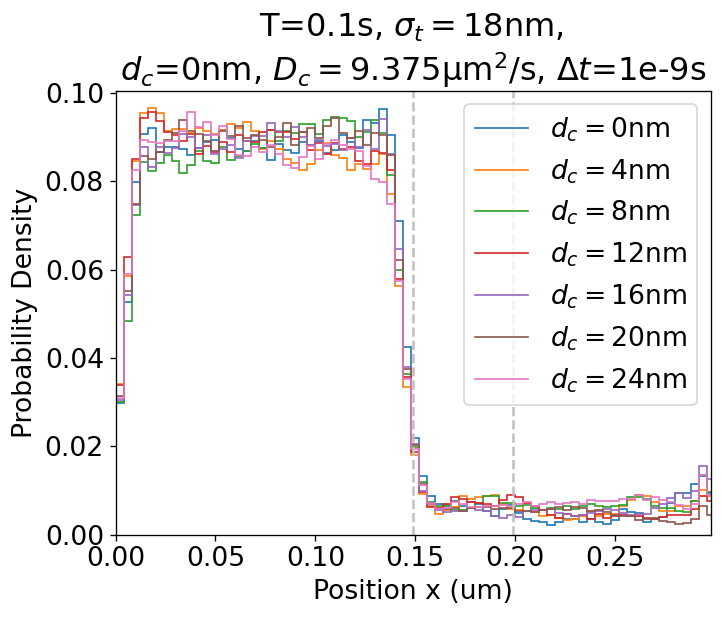

In [20]:
key1 = ('18', '0', '9.375', '9.6', '692', '1e-9')
labels = [str(2 * x) for x in range(0, 14, 2)]

fig, ax1 = plt.subplots()

for altkey in labels:
    newkey = (key1[0], altkey, key1[2], key1[3], key1[4], key1[5])
    tmp = numpy.array(sum([data1[newkey][t_] for t_ in t1[-300: ]], []))
    L = L1 * 2
    bins = numpy.arange(0, L + interval, interval)
    counts, _ = numpy.histogram(tmp, bins=bins)
    ymax = max(counts) / sum(counts) / L
    plt.stairs(counts / sum(counts) / L, bins, label=fr"$d_c=${altkey}nm")

plt.plot((L1, L1), (0, 1.05 * ymax), '--', color="silver")
plt.plot((L1 + deltax, L1 + deltax), (0, 1.05 * ymax), '--', color="silver")
plt.ylim(0, 1.05 * ymax)

plt.xlabel("Position x (um)")
plt.ylabel("Probability Density")
plt.xlim(0 * L1, 2 * L1)
plt.legend(loc='upper right')
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")

fig.savefig(artifacts / 'Mobile_Immobile1-05.svg', format='svg')
plt.show()

In [21]:
potentials = {}
for key in data1.keys():
    tmp = numpy.ravel([data1[key][t_] for t_ in t1[-300: ]])
    p = sum(tmp > L1 + deltax) / len(tmp)
    p1 = p / ((L1 - deltax) / (2 * L1))
    p2 = (1 - p) / ((L1 + deltax) / (2 * L1))
    potentials[key] = p1 / p2

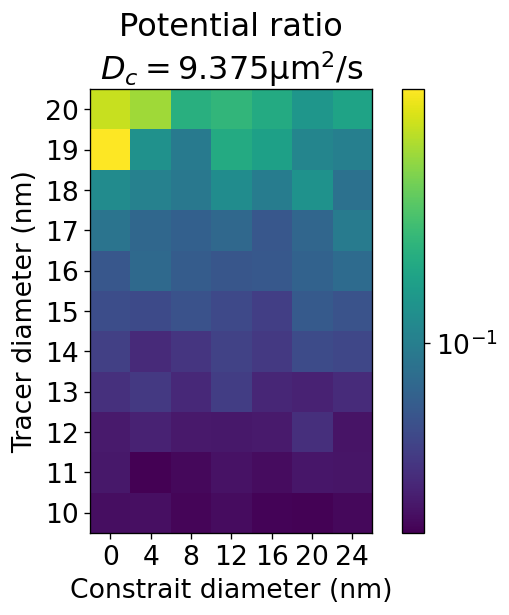

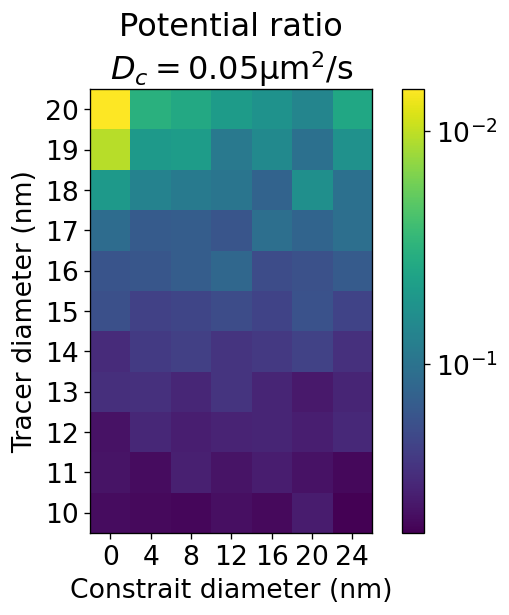

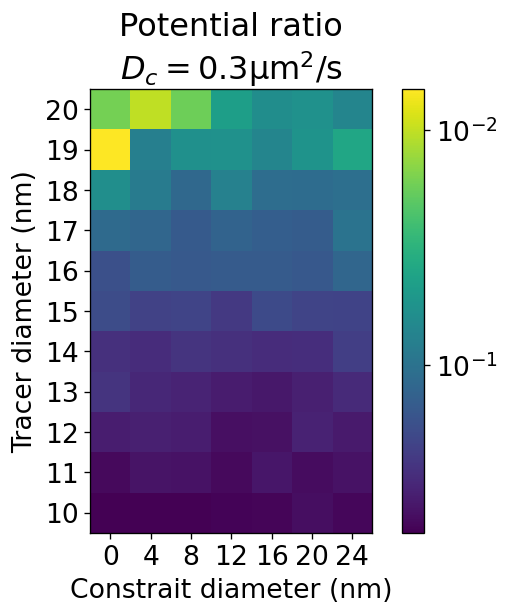

In [22]:
for i, D_crowder_ in enumerate(('9.375', '0.05', '0.3')):
    tmp = [[potentials[(xi, yi, D_crowder_, '9.6', '692', '1e-9')] for yi in ykeylabels] for xi in xkeylabels]
    tmp = -numpy.log10(tmp)

    fig, ax = plt.subplots()
    im = ax.imshow(tmp, origin="lower")
    cbar = fig.colorbar(im, ticks=[+1, +2])
    cbar.ax.set_yticklabels([r'$10^{-1}$', r'$10^{-2}$'])
    plt.xticks(range(len(ykeylabels)), ykeylabels)
    plt.yticks(range(len(xkeylabels)), xkeylabels)
    plt.ylabel("Tracer diameter (nm)")
    plt.xlabel("Constrait diameter (nm)")
    plt.title(rf"Potential ratio" + "\n" + rf"$D_c={D_crowder_}\mathrm{{\mu m^2}}$/s")

    fig.savefig(artifacts / f'Mobile_Immobile1-06-{i}.svg', format='svg')
    plt.show()

## Intersection

In [23]:
prob_summary1 = {}
for key in data1.keys():
    data_ = data1[key]
    tmp = numpy.array([data_[t__] for t__ in t1])
    maxidx = len(tmp.T[0])
    
    prob = numpy.array([numpy.argmax(tmp.T[i] > L1 + deltax) if max(tmp.T[i]) > L1 + deltax else maxidx for i in range(len(tmp.T))])
    prob_summary1[key] = prob

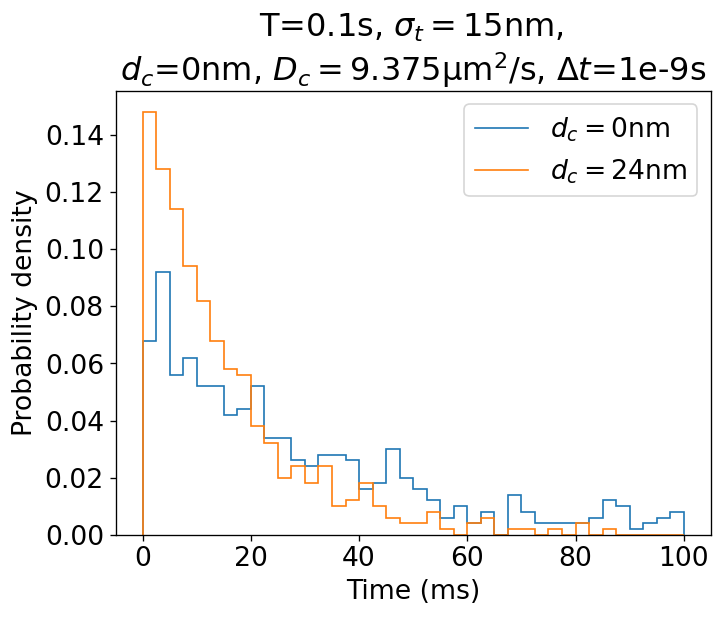

In [24]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')
key2 = ('15', '24', '9.375', '9.6', '692', '1e-9')

nbins = 41
bins = numpy.linspace(0, len(t1), nbins)
x = numpy.linspace(float(t1[0]), float(t1[-1]), nbins)
fig, ax1 = plt.subplots()
y = prob_summary1[key1]
y = y[y != len(t1)]
counts, _ = numpy.histogram(y, bins=bins)
plt.stairs(counts / len(prob_summary1[key1]), x * 1000, label=fr"$d_c=${key1[1]}nm")
y = prob_summary1[key2]
y = y[y != len(t1)]
counts, _ = numpy.histogram(y, bins=bins)
plt.stairs(counts / len(prob_summary1[key2]), x * 1000, label=fr"$d_c=${key2[1]}nm")
plt.ylabel("Probability density")
plt.xlabel("Time (ms)")
plt.legend(loc='upper right')
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
fig.savefig(artifacts / 'Mobile_Immobile1-07.svg', format='svg')
plt.show()

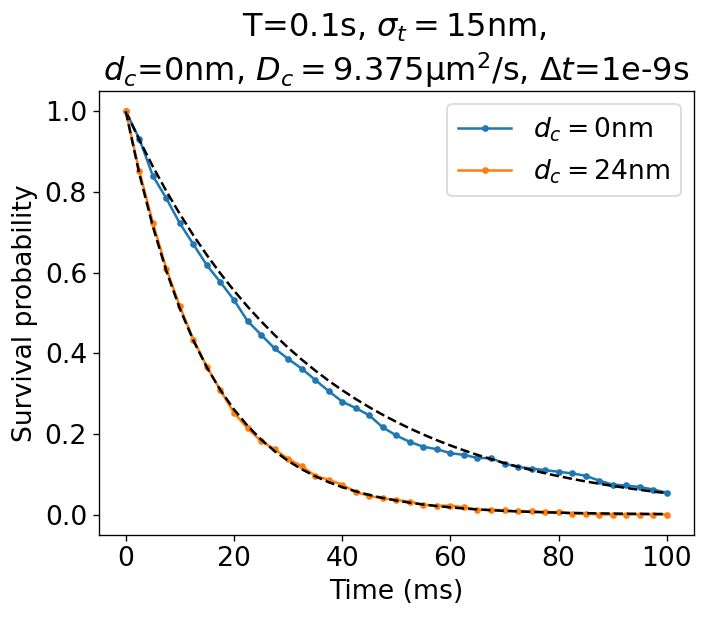

In [25]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')
key2 = ('15', '24', '9.375', '9.6', '692', '1e-9')

nbins = 41
bins = numpy.linspace(0, len(t1), nbins)
x = numpy.linspace(float(t1[0]), float(t1[-1]), nbins)

fig, ax1 = plt.subplots()

tot = len(prob_summary1[key1])
y = prob_summary1[key1]
y = y[y != len(t1)]
y = numpy.array([(tot - sum(y <= idx)) / tot for idx in bins])
reg = LinearRegression(fit_intercept=False).fit(x[y > 0].reshape(-1, 1), numpy.log(y[y > 0]))
plt.plot(x * 1000, y, '.-', label=fr"$d_c=${key1[1]}nm")
plt.plot(x * 1000, numpy.exp(reg.coef_[0] * x), 'k--')

tot = len(prob_summary1[key2])
y = prob_summary1[key2]
y = y[y != len(t1)]
y = numpy.array([(tot - sum(y <= idx)) / tot for idx in bins])
reg = LinearRegression(fit_intercept=False).fit(x[y > 0].reshape(-1, 1), numpy.log(y[y > 0]))
plt.plot(x * 1000, y, '.-', label=fr"$d_c=${key2[1]}nm")
plt.plot(x * 1000, numpy.exp(reg.coef_[0] * x), 'k--')

plt.ylabel("Survival probability")
plt.xlabel("Time (ms)")
plt.legend(loc='upper right')
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
fig.savefig(artifacts / 'Mobile_Immobile1-08.svg', format='svg')
plt.show()

In [26]:
threshold = 1e-2
nbins = 41
bins = numpy.linspace(0, len(t1), nbins)
x = numpy.linspace(float(t1[0]), float(t1[-1]), nbins)
intersection_rates = {}
for key in prob_summary1.keys():
    tot = len(prob_summary1[key])
    y = prob_summary1[key]
    y = y[y != len(t1)]
    y = numpy.array([(tot - sum(y <= idx)) / tot for idx in bins])
    # reg = LinearRegression(fit_intercept=False).fit(x[y > 0].reshape(-1, 1), numpy.log(y[y > 0]))
    reg = LinearRegression(fit_intercept=False).fit(x[y >= threshold].reshape(-1, 1), numpy.log(y[y >= threshold]))
    intersection_rates[key] = -reg.coef_[0]

In [27]:
intersection_rates

{('18', '4', '0.05', '9.6', '692', '1e-9'): 5.024285442758326,
 ('20', '24', '0.05', '9.6', '692', '1e-9'): 1.798731819833699,
 ('11', '12', '9.375', '9.6', '692', '1e-9'): 194.69676698096671,
 ('20', '8', '0.05', '9.6', '692', '1e-9'): 1.7298783698911986,
 ('13', '12', '9.375', '9.6', '692', '1e-9'): 97.66185713532765,
 ('12', '20', '0.05', '9.6', '692', '1e-9'): 120.8734279166739,
 ('10', '20', '0.05', '9.6', '692', '1e-9'): 179.6386395042019,
 ('19', '12', '9.375', '9.6', '692', '1e-9'): 7.394595322276498,
 ('14', '0', '9.375', '9.6', '692', '1e-9'): 42.77863090732701,
 ('18', '24', '9.375', '9.6', '692', '1e-9'): 22.10604670107715,
 ('12', '0', '9.375', '9.6', '692', '1e-9'): 94.0154417733164,
 ('20', '20', '0.05', '9.6', '692', '1e-9'): 2.160464164874176,
 ('12', '0', '0.05', '9.6', '692', '1e-9'): 108.58611945019288,
 ('20', '12', '0.05', '9.6', '692', '1e-9'): 1.8237643818731628,
 ('13', '16', '0.05', '9.6', '692', '1e-9'): 75.55488941839057,
 ('14', '4', '9.375', '9.6', '692', 

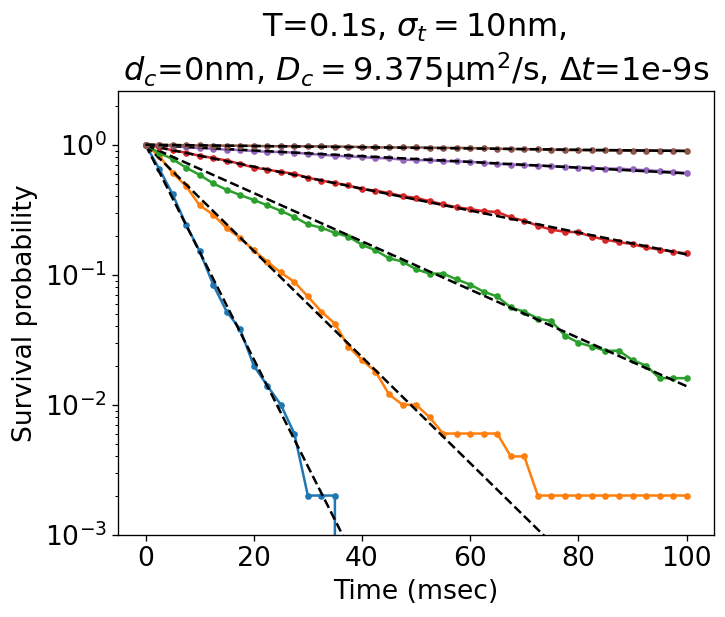

In [28]:
key1 = ('10', '0', '9.375', '9.6', '692', '1e-9')

nbins = 41
bins = numpy.linspace(0, len(t1), nbins)
x = numpy.linspace(float(t1[0]), float(t1[-1]), nbins)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

for i, altkey_ in enumerate(xkeylabels[:: 2]):
    newkey = (altkey_, key1[1], key1[2], key1[3], key1[4], key1[5])
    tot = len(prob_summary1[newkey])
    y = prob_summary1[newkey]
    y = y[y != len(t1)]
    y = numpy.array([(tot - sum(y <= idx)) / tot for idx in bins])
    coef = intersection_rates[newkey]
    plt.plot(x * 1000, y, '.-', label=fr"$d_c=${newkey[1]}nm")
    plt.plot(x * 1000, numpy.exp(-coef * x), 'k--')

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylim(threshold * 0.1, )
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
# plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-09.svg', format='svg')
plt.show()

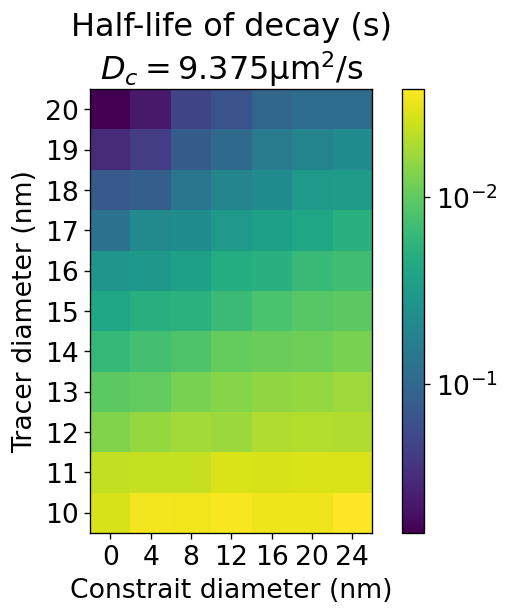

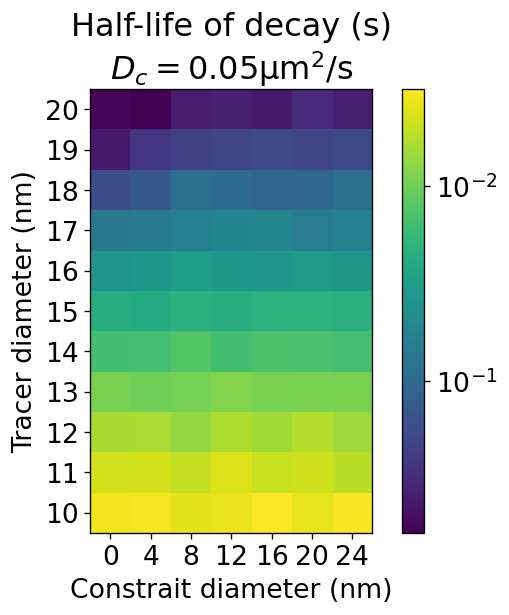

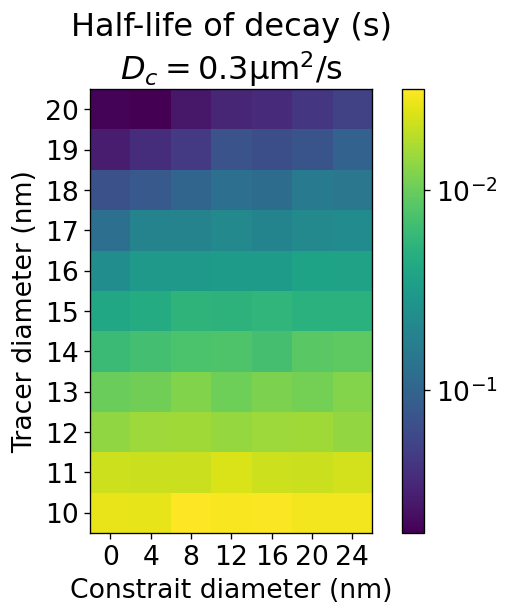

In [29]:
for i, D_crowder_ in enumerate(('9.375', '0.05', '0.3')):
    tmp = [[numpy.log(2) / intersection_rates[(xi, yi, D_crowder_, '9.6', '692', '1e-9')] for yi in ykeylabels] for xi in xkeylabels]
    tmp = -numpy.log10(tmp)

    fig, ax = plt.subplots()
    im = ax.imshow(tmp, origin="lower")
    cbar = fig.colorbar(im, ticks=[+1, +2])
    cbar.ax.set_yticklabels([r'$10^{-1}$', r'$10^{-2}$'])
    plt.xticks(range(len(ykeylabels)), ykeylabels)
    plt.yticks(range(len(xkeylabels)), xkeylabels)
    plt.ylabel("Tracer diameter (nm)")
    plt.xlabel("Constrait diameter (nm)")
    plt.title(rf"Half-life of decay (s)" + "\n" + rf"$D_c={D_crowder_}\mathrm{{\mu m^2}}$/s")
    fig.savefig(artifacts / f'Mobile_Immobile1-10-{i}.svg', format='svg')
    plt.show()

## Pair reactions

In [30]:
conc = 1 / ((L1 * 1e-6) ** 3)
print(f"{conc / 1000 / 6.02e+23 * 1e+9} nM")
kD = 4 * numpy.pi * (10e-9 + 9.6e-9) * 0.5 * (90 / 10 * 1e-12)
print(f"{kD * conc} 1/s")
print(f"{numpy.log(2) / (kD * conc):.3e} s")

502.1629922669039 nM
335.0577315993926 1/s
2.069e-03 s


In [31]:
def read_file(filename, data=None, N=0, sp=None, func=None):
    data = data or []
    sptable = defaultdict(list)
    with filename.open("r") as f:
        for line in f:
            if line.startswith('0,C'):
                row = line.strip().split(",")
                if func is not None and not func(float(row[3])): continue  #XXX
                sptable[row[1]].append(int(row[2]))
                continue
            elif not line.startswith('#C,'):
                continue
            row = line.strip().split(",")
            row = row[1: ]
            assert len(row) == 3
            crowder, tracer, t = int(row[0]), int(row[1]), float(row[2])
            if sp is not None and crowder not in sptable[sp]:
                continue
            data.append(t)
    if sp is None:
        N += sum(len(v) for v in sptable.values())
    else:
        N += len(sptable[sp])
    return data, N

def read_files(filenames, sp=None, func=None):
    data, N = [], 0
    for filename in filenames:
        if isinstance(filename, str):
            filename = pathlib.Path(filename)
        data, N = read_file(filename, data, N, sp, func)
    return data, N

In [32]:
reaction_all = {}
for key, filenames in filenames1.items():
    reaction_all[key] = read_files(filenames)

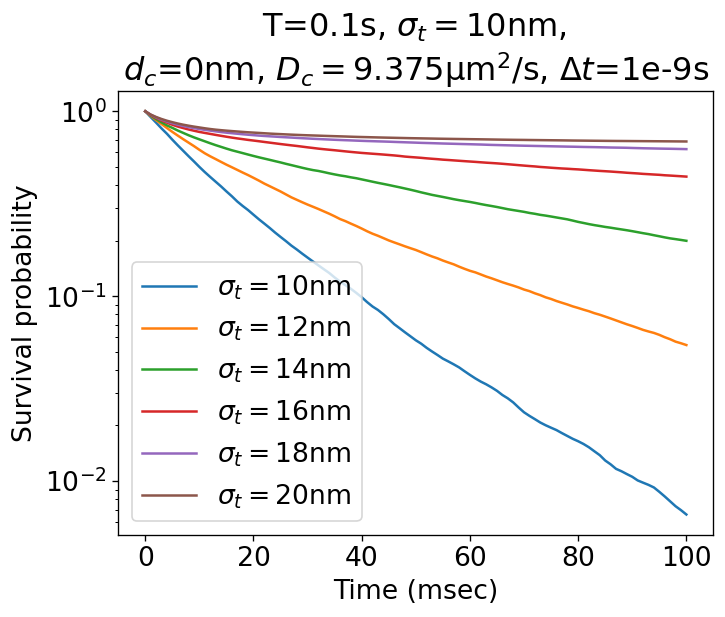

In [33]:
key1 = ('10', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(xkeylabels[:: 2]):
    newkey = (altkey_, key1[1], key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_all[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"$\sigma_t=${altkey_}nm", color=colors[i])

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-11.svg', format='svg')
plt.show()

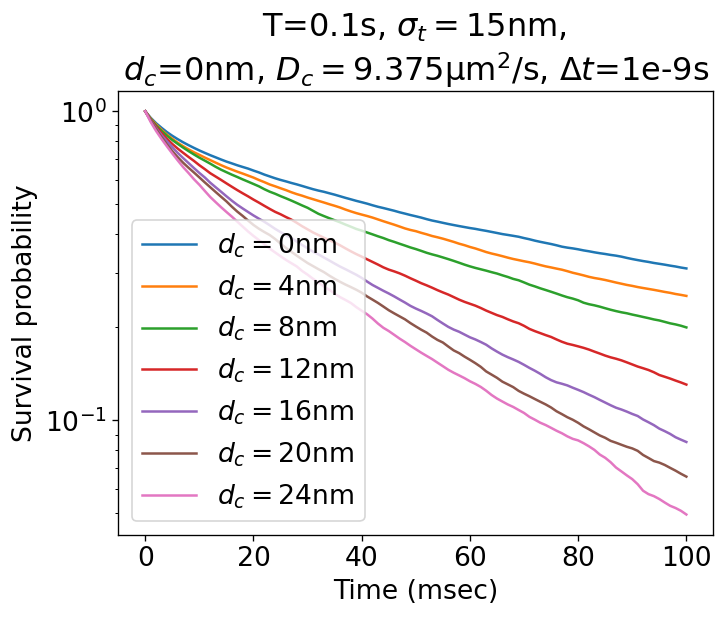

In [34]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(ykeylabels):
    newkey = (key1[0], altkey_, key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_all[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"$d_c=${altkey_}nm", color=colors[i])

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-12.svg', format='svg')
plt.show()

In [35]:
reaction_deep = {}
for key, filenames in filenames1.items():
    reaction_deep[key] = read_files(filenames, sp="C2", func=lambda x: L1 + deltax < x)

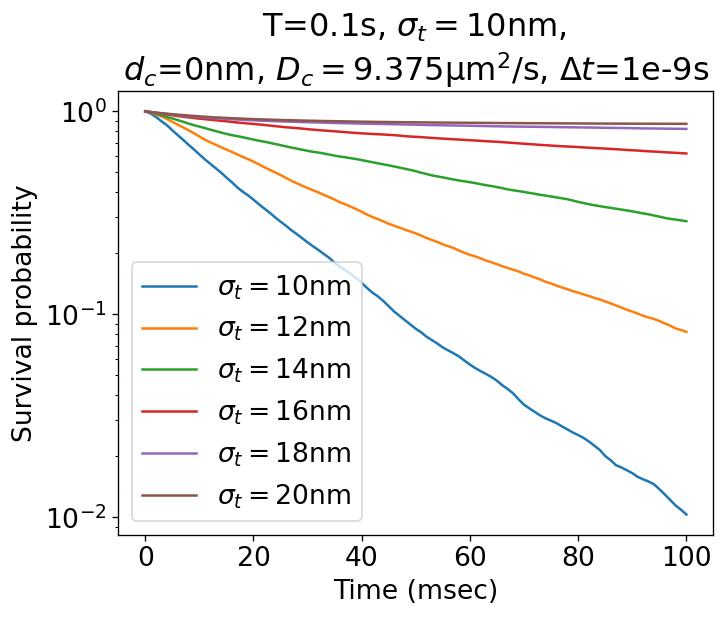

In [36]:
key1 = ('10', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(xkeylabels[:: 2]):
    newkey = (altkey_, key1[1], key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_deep[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"$\sigma_t=${altkey_}nm", color=colors[i])

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-13.svg', format='svg')
plt.show()

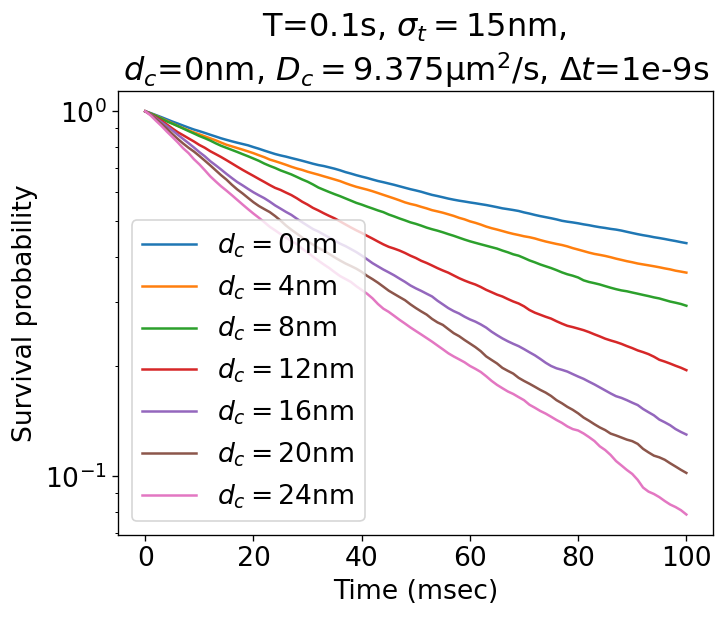

In [37]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(ykeylabels):
    newkey = (key1[0], altkey_, key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_deep[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"$d_c=${altkey_}nm", color=colors[i])

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-14.svg', format='svg')
plt.show()

In [38]:
x = numpy.array([float(t_) for t_ in t1[:: 100]])

pair_reaction_rates = {}
for key, (value, N) in reaction_deep.items():
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    y = 1 - y
    reg = LinearRegression().fit(x[y > 0].reshape(-1, 1), numpy.log(y[y > 0]))
    reg_nointercept = LinearRegression(fit_intercept=False).fit(x[y > 0].reshape(-1, 1), numpy.log(y[y > 0]))
    pair_reaction_rates[key] = (-reg.coef_[0], reg.intercept_, -reg_nointercept.coef_[0])

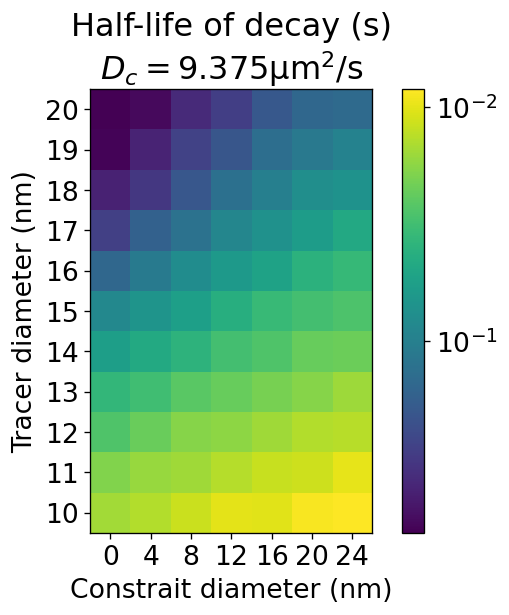

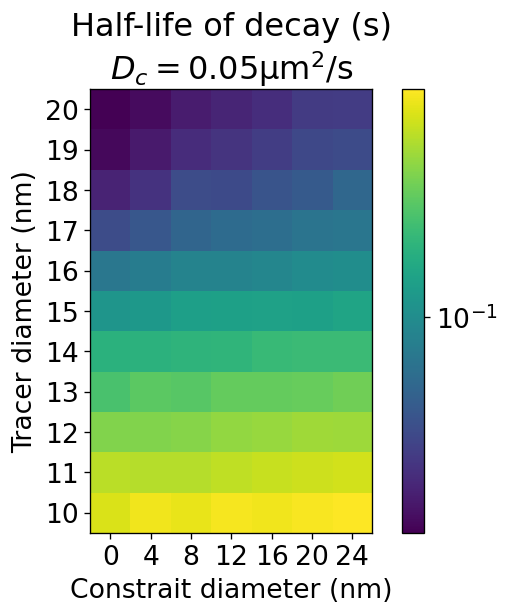

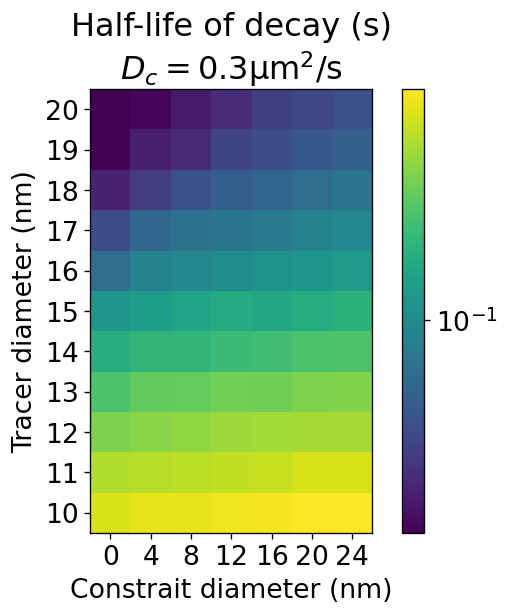

In [39]:
for i, D_crowder_ in enumerate(('9.375', '0.05', '0.3')):
    tmp = [[numpy.log(2) / pair_reaction_rates[(xi, yi, D_crowder_, '9.6', '692', '1e-9')][0] for yi in ykeylabels] for xi in xkeylabels]
    tmp = -numpy.log10(tmp)

    fig, ax = plt.subplots()
    im = ax.imshow(tmp, origin="lower")
    cbar = fig.colorbar(im, ticks=[+1, +2])
    cbar.ax.set_yticklabels([r'$10^{-1}$', r'$10^{-2}$'])
    plt.xticks(range(len(ykeylabels)), ykeylabels)
    plt.yticks(range(len(xkeylabels)), xkeylabels)
    plt.ylabel("Tracer diameter (nm)")
    plt.xlabel("Constrait diameter (nm)")
    plt.title(rf"Half-life of decay (s)" + "\n" + rf"$D_c={D_crowder_}\mathrm{{\mu m^2}}$/s")
    fig.savefig(artifacts / f'Mobile_Immobile1-15-{i}.svg', format='svg')
    plt.show()

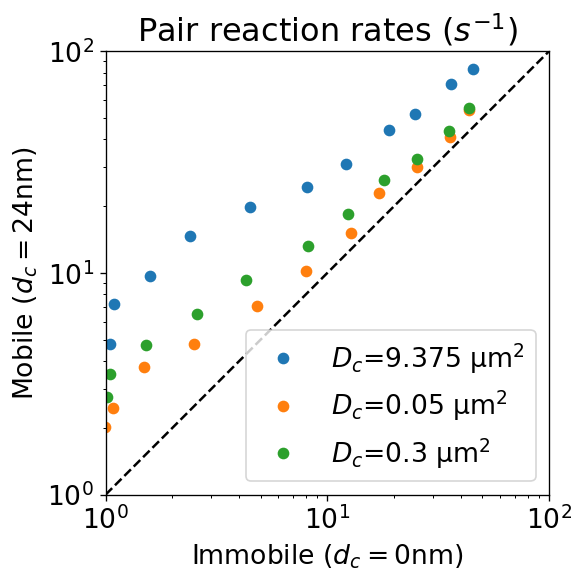

In [40]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

vmin, vmax = +numpy.inf, -numpy.inf
ax1 = plt.subplot()

for D_crowder_ in ('9.375', '0.05', '0.3'):
    x = numpy.array([pair_reaction_rates[(xi, ykeylabels[0], D_crowder_, '9.6', '692', '1e-9')][0] for xi in xkeylabels])
    y = numpy.array([pair_reaction_rates[(xi, ykeylabels[-1], D_crowder_, '9.6', '692', '1e-9')][0] for xi in xkeylabels])

    vmin = min((vmin, x.min(), y.min()))
    vmax = max((vmax, x.max(), y.max()))
    vmin, vmax = 0.95 * vmin, 1.05 * vmax

    plt.loglog(x, y, 'o', label=rf"$D_c$={D_crowder_} $\mathrm{{\mu m^2}}$")

vmin, vmax = 1, 100    

plt.loglog((vmin, vmax), (vmin, vmax), 'k--')
plt.xlabel(fr'Immobile ($d_c=${ykeylabels[0]}nm)')
plt.ylabel(fr'Mobile ($d_c=${ykeylabels[-1]}nm)')
ax1.set_aspect('equal')
plt.legend(loc='best')
plt.xlim(vmin, vmax)
plt.ylim(vmin, vmax)
plt.title(r"Pair reaction rates ($s^{-1}$)")
fig.savefig(artifacts / 'Mobile_Immobile1-16.svg', format='svg')
plt.show()

## Appendix

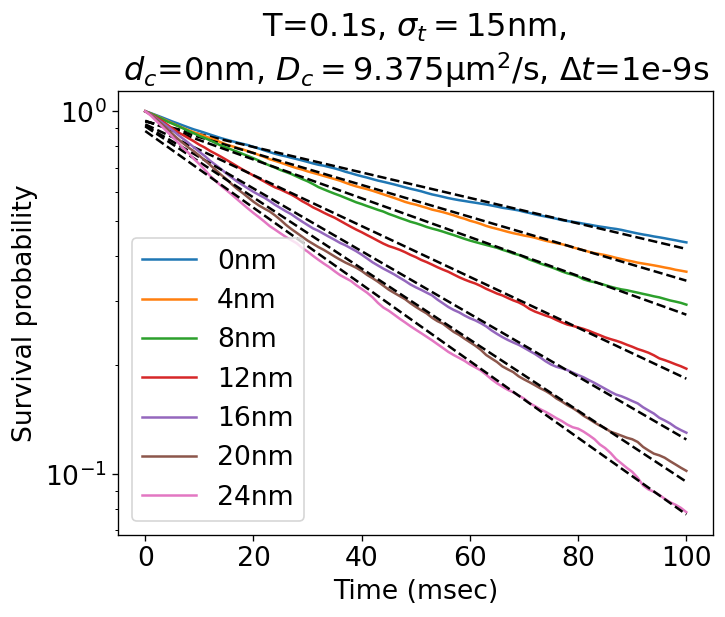

In [41]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(ykeylabels):
    newkey = (key1[0], altkey_, key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_deep[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"{altkey_}nm", color=colors[i])
    a, b, _ = pair_reaction_rates[newkey]
    ax1.plot(x * 1000, numpy.exp(-a * x + b), 'k--')

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-17.svg', format='svg')
plt.show()

In [42]:
reaction_sparse = {}
for key, filenames in filenames1.items():
    reaction_sparse[key] = read_files(filenames, sp="C1")

In [43]:
threshold = 1e-3

x = numpy.array([float(t_) for t_ in t1[:: 100]])

pair_reaction_rates_sparse = {}
for key, (value, N) in reaction_sparse.items():
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    y = 1 - y
    reg = LinearRegression().fit(x[y >= threshold].reshape(-1, 1), numpy.log(y[y >= threshold]))
    reg_nointercept = LinearRegression(fit_intercept=False).fit(x[y >= threshold].reshape(-1, 1), numpy.log(y[y >= threshold]))
    pair_reaction_rates_sparse[key] = (-reg.coef_[0], reg.intercept_, -reg_nointercept.coef_[0])

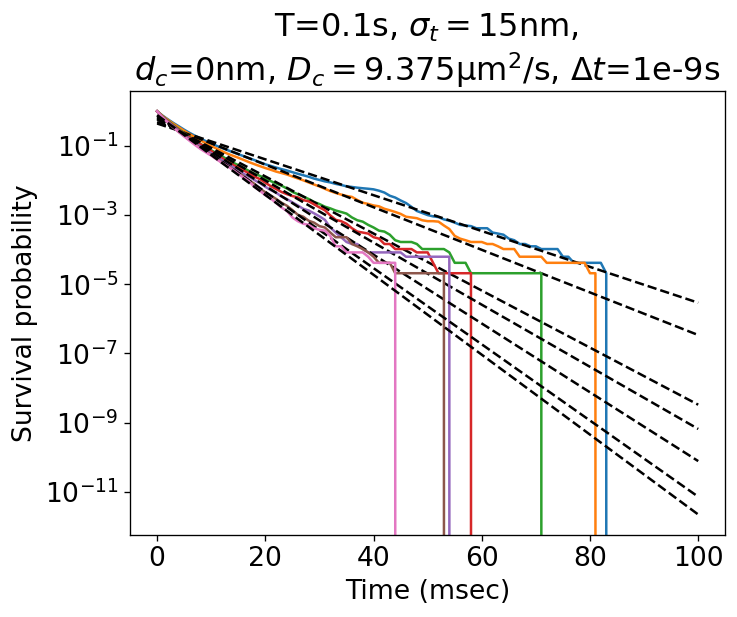

In [44]:
key1 = ('15', '0', '9.375', '9.6', '692', '1e-9')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax1 = plt.subplot()

x = numpy.array([float(t_) for t_ in t1[:: 100]])

for i, altkey_ in enumerate(ykeylabels):
    newkey = (key1[0], altkey_, key1[2], key1[3], key1[4], key1[5])
    value, N = reaction_sparse[newkey]
    y = numpy.array([sum(value < t_) for t_ in x]) / (N * N_tracer)
    ax1.plot(x * 1000, 1 - y, '-', label=fr"{altkey_}nm", color=colors[i])
    a, b, _ = pair_reaction_rates_sparse[newkey]
    ax1.plot(x * 1000, numpy.exp(-a * x + b), 'k--')

ax1.set_yscale('log')
ax1.set_xlabel("Time (msec)")
ax1.set_ylabel("Survival probability")
plt.title(fr"T={t1[-1]}s, $\sigma_t=${key1[0]}nm, " + "\n" + fr"$d_c$={key1[1]}nm, $D_c=${key1[2]}$\mathrm{{\mu m^2}}$/s, $\Delta t$={key1[5]}s")
# plt.legend(loc='lower left')
fig.savefig(artifacts / 'Mobile_Immobile1-18.svg', format='svg')
plt.show()

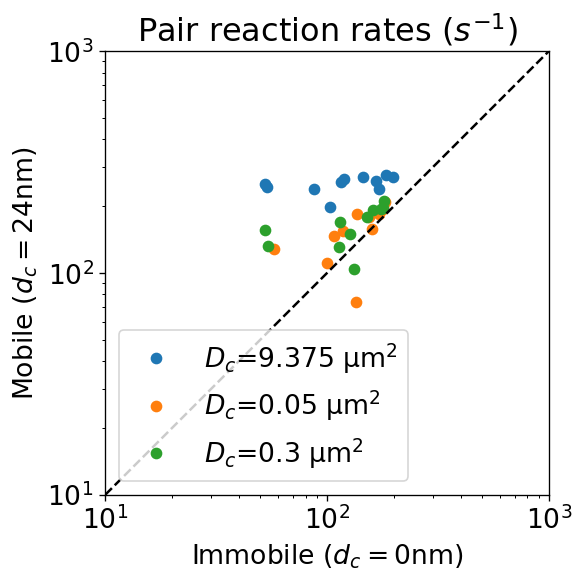

In [45]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

vmin, vmax = +numpy.inf, -numpy.inf
ax1 = plt.subplot()

for D_crowder_ in ('9.375', '0.05', '0.3'):
    x = numpy.array([pair_reaction_rates_sparse[(xi, ykeylabels[0], D_crowder_, '9.6', '692', '1e-9')][0] for xi in xkeylabels])
    y = numpy.array([pair_reaction_rates_sparse[(xi, ykeylabels[-1], D_crowder_, '9.6', '692', '1e-9')][0] for xi in xkeylabels])

    vmin = min((vmin, x.min(), y.min()))
    vmax = max((vmax, x.max(), y.max()))
    vmin, vmax = 0.95 * vmin, 1.05 * vmax

    plt.loglog(x, y, 'o', label=rf"$D_c$={D_crowder_} $\mathrm{{\mu m^2}}$")

vmin, vmax = 10, 1000    

plt.loglog((vmin, vmax), (vmin, vmax), 'k--')
plt.xlabel(fr'Immobile ($d_c=${ykeylabels[0]}nm)')
plt.ylabel(fr'Mobile ($d_c=${ykeylabels[-1]}nm)')
ax1.set_aspect('equal')
plt.legend(loc='best')
plt.xlim(vmin, vmax)
plt.ylim(vmin, vmax)
plt.title(r"Pair reaction rates ($s^{-1}$)")
fig.savefig(artifacts / 'Mobile_Immobile1-19.svg', format='svg')
plt.show()